# ResNeXt

## 1. Environment Setup

### 1.0. Check GPU

In [1]:
!nvidia-smi

Mon Aug 31 05:08:30 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.40       Driver Version: 430.40       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 108...  Off  | 00000000:05:00.0 Off |                  N/A |
| 23%   31C    P8     9W / 250W |     18MiB / 11176MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  TITAN Xp            Off  | 00000000:06:00.0 Off |                  N/A |
| 23%   32C    P8     9W / 250W |      2MiB / 12196MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  T

### 1.1. Install Pytorch and torchvision

In [2]:
# Install pytorch and torchvision
!pip install --default-timeout=1000 torch torchvision

### 1.2. Install matplotlib

In [3]:
!pip install --default-timeout=1000 matplotlib

### 1.3. Import

In [4]:
import train

import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

# Ignore Warning
import warnings
warnings.filterwarnings(action='ignore')

## 2. Data Preprocessing

In [5]:
batch_size = 128

In [6]:
train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

trainset = torchvision.datasets.CIFAR10('./data/', train=True, download=True, transform=train_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, pin_memory=True)

testset = torchvision.datasets.CIFAR10('./data/', train=False, download=True, transform=test_transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, pin_memory=True)

Files already downloaded and verified
Files already downloaded and verified


## 3. Train Model

In [7]:
depth = 29
num_classes = 10
pretrained = False

gpu_id = 0
epoch_print = 20

epochs = 300

lr = 0.1
momentum = 0.9
weight_decay = 0.0005
nesterov = True

In [8]:
resnext = train.ResNeXt(depth=depth, num_classes=num_classes, pretrained=pretrained, 
                        gpu_id=gpu_id, epoch_print=epoch_print)

=> Create model with depth : 29


In [9]:
resnext.train(trainloader, testloader, 
              epochs=epochs, lr=lr, momentum=momentum, weight_decay=weight_decay, nesterov=nesterov)

Epoch 1 Started...
Iteration : 10 - Train Loss : 2.81, Test Loss : 3180.00, Train Acc : 9.38, Test Acc : 10.01
Iteration : 20 - Train Loss : 2.75, Test Loss : 674.51, Train Acc : 9.38, Test Acc : 8.88
Iteration : 30 - Train Loss : 2.45, Test Loss : 6.11, Train Acc : 14.06, Test Acc : 10.21
Iteration : 40 - Train Loss : 2.29, Test Loss : 2.58, Train Acc : 9.38, Test Acc : 10.55
Iteration : 50 - Train Loss : 2.28, Test Loss : 2.31, Train Acc : 12.50, Test Acc : 11.06
Iteration : 60 - Train Loss : 2.31, Test Loss : 2.31, Train Acc : 10.94, Test Acc : 10.70
Iteration : 70 - Train Loss : 2.28, Test Loss : 2.30, Train Acc : 9.38, Test Acc : 11.70
Iteration : 80 - Train Loss : 2.29, Test Loss : 2.29, Train Acc : 11.72, Test Acc : 11.76
Iteration : 90 - Train Loss : 2.29, Test Loss : 2.28, Train Acc : 10.16, Test Acc : 10.48
Iteration : 100 - Train Loss : 2.28, Test Loss : 2.27, Train Acc : 11.72, Test Acc : 12.55
Iteration : 110 - Train Loss : 2.23, Test Loss : 2.22, Train Acc : 17.19, Test A

Iteration : 130 - Train Loss : 0.38, Test Loss : 0.57, Train Acc : 85.94, Test Acc : 80.40
Iteration : 140 - Train Loss : 0.52, Test Loss : 0.72, Train Acc : 83.59, Test Acc : 77.78
Iteration : 150 - Train Loss : 0.33, Test Loss : 0.67, Train Acc : 89.06, Test Acc : 77.35
Iteration : 160 - Train Loss : 0.37, Test Loss : 0.60, Train Acc : 84.38, Test Acc : 81.09
Iteration : 170 - Train Loss : 0.41, Test Loss : 0.49, Train Acc : 87.50, Test Acc : 83.70
Iteration : 180 - Train Loss : 0.48, Test Loss : 0.47, Train Acc : 79.69, Test Acc : 83.61
Iteration : 190 - Train Loss : 0.34, Test Loss : 0.54, Train Acc : 86.72, Test Acc : 81.82
Iteration : 200 - Train Loss : 0.37, Test Loss : 0.70, Train Acc : 85.94, Test Acc : 77.03
Iteration : 210 - Train Loss : 0.35, Test Loss : 0.77, Train Acc : 85.16, Test Acc : 75.63
Iteration : 220 - Train Loss : 0.42, Test Loss : 0.56, Train Acc : 85.16, Test Acc : 81.99
Iteration : 230 - Train Loss : 0.45, Test Loss : 0.54, Train Acc : 82.81, Test Acc : 81.82

Iteration : 250 - Train Loss : 0.42, Test Loss : 0.57, Train Acc : 85.94, Test Acc : 81.23
Iteration : 260 - Train Loss : 0.37, Test Loss : 0.99, Train Acc : 88.28, Test Acc : 71.12
Iteration : 270 - Train Loss : 0.35, Test Loss : 0.49, Train Acc : 89.84, Test Acc : 83.29
Iteration : 280 - Train Loss : 0.52, Test Loss : 0.64, Train Acc : 82.81, Test Acc : 79.50
Iteration : 290 - Train Loss : 0.43, Test Loss : 0.61, Train Acc : 83.59, Test Acc : 80.21
Iteration : 300 - Train Loss : 0.40, Test Loss : 0.62, Train Acc : 84.38, Test Acc : 80.46
Iteration : 310 - Train Loss : 0.35, Test Loss : 0.51, Train Acc : 89.84, Test Acc : 83.33
Iteration : 320 - Train Loss : 0.34, Test Loss : 0.62, Train Acc : 86.72, Test Acc : 79.44
Iteration : 330 - Train Loss : 0.40, Test Loss : 0.63, Train Acc : 86.72, Test Acc : 79.23
Iteration : 340 - Train Loss : 0.29, Test Loss : 0.84, Train Acc : 92.19, Test Acc : 74.99
Iteration : 350 - Train Loss : 0.28, Test Loss : 0.48, Train Acc : 91.41, Test Acc : 84.24

Iteration : 370 - Train Loss : 0.31, Test Loss : 0.51, Train Acc : 89.06, Test Acc : 83.17
Iteration : 380 - Train Loss : 0.47, Test Loss : 0.50, Train Acc : 83.59, Test Acc : 82.61
Iteration : 390 - Train Loss : 0.34, Test Loss : 0.50, Train Acc : 85.16, Test Acc : 83.30
Epoch 141 Started...
Iteration : 10 - Train Loss : 0.33, Test Loss : 0.66, Train Acc : 88.28, Test Acc : 79.02
Iteration : 20 - Train Loss : 0.29, Test Loss : 0.55, Train Acc : 91.41, Test Acc : 81.84
Iteration : 30 - Train Loss : 0.52, Test Loss : 0.71, Train Acc : 82.81, Test Acc : 77.03
Iteration : 40 - Train Loss : 0.20, Test Loss : 0.60, Train Acc : 91.41, Test Acc : 79.12
Iteration : 50 - Train Loss : 0.24, Test Loss : 0.54, Train Acc : 91.41, Test Acc : 82.00
Iteration : 60 - Train Loss : 0.40, Test Loss : 0.48, Train Acc : 85.94, Test Acc : 84.31
Iteration : 70 - Train Loss : 0.38, Test Loss : 0.55, Train Acc : 83.59, Test Acc : 82.48
Iteration : 80 - Train Loss : 0.32, Test Loss : 0.81, Train Acc : 89.06, Tes

Iteration : 100 - Train Loss : 0.13, Test Loss : 0.30, Train Acc : 95.31, Test Acc : 90.85
Iteration : 110 - Train Loss : 0.09, Test Loss : 0.29, Train Acc : 96.88, Test Acc : 91.50
Iteration : 120 - Train Loss : 0.08, Test Loss : 0.28, Train Acc : 96.09, Test Acc : 91.66
Iteration : 130 - Train Loss : 0.03, Test Loss : 0.27, Train Acc : 99.22, Test Acc : 91.90
Iteration : 140 - Train Loss : 0.07, Test Loss : 0.27, Train Acc : 96.09, Test Acc : 91.69
Iteration : 150 - Train Loss : 0.06, Test Loss : 0.29, Train Acc : 98.44, Test Acc : 91.25
Iteration : 160 - Train Loss : 0.06, Test Loss : 0.29, Train Acc : 97.66, Test Acc : 91.31
Iteration : 170 - Train Loss : 0.09, Test Loss : 0.32, Train Acc : 96.88, Test Acc : 90.79
Iteration : 180 - Train Loss : 0.05, Test Loss : 0.28, Train Acc : 97.66, Test Acc : 91.63
Iteration : 190 - Train Loss : 0.07, Test Loss : 0.28, Train Acc : 96.88, Test Acc : 91.51
Iteration : 200 - Train Loss : 0.16, Test Loss : 0.27, Train Acc : 93.75, Test Acc : 91.95

Iteration : 220 - Train Loss : 0.10, Test Loss : 0.31, Train Acc : 96.09, Test Acc : 90.77
Iteration : 230 - Train Loss : 0.12, Test Loss : 0.29, Train Acc : 96.88, Test Acc : 91.05
Iteration : 240 - Train Loss : 0.05, Test Loss : 0.32, Train Acc : 99.22, Test Acc : 90.46
Iteration : 250 - Train Loss : 0.10, Test Loss : 0.31, Train Acc : 96.88, Test Acc : 90.91
Iteration : 260 - Train Loss : 0.03, Test Loss : 0.31, Train Acc : 100.00, Test Acc : 91.02
Iteration : 270 - Train Loss : 0.05, Test Loss : 0.28, Train Acc : 98.44, Test Acc : 91.41
Iteration : 280 - Train Loss : 0.09, Test Loss : 0.27, Train Acc : 97.66, Test Acc : 91.74
Iteration : 290 - Train Loss : 0.07, Test Loss : 0.28, Train Acc : 97.66, Test Acc : 91.42
Iteration : 300 - Train Loss : 0.19, Test Loss : 0.32, Train Acc : 93.75, Test Acc : 90.60
Iteration : 310 - Train Loss : 0.10, Test Loss : 0.40, Train Acc : 98.44, Test Acc : 88.52
Iteration : 320 - Train Loss : 0.08, Test Loss : 0.35, Train Acc : 97.66, Test Acc : 89.9

Iteration : 340 - Train Loss : 0.02, Test Loss : 0.22, Train Acc : 100.00, Test Acc : 93.88
Iteration : 350 - Train Loss : 0.01, Test Loss : 0.22, Train Acc : 100.00, Test Acc : 93.88
Iteration : 360 - Train Loss : 0.00, Test Loss : 0.22, Train Acc : 100.00, Test Acc : 93.88
Iteration : 370 - Train Loss : 0.01, Test Loss : 0.22, Train Acc : 100.00, Test Acc : 93.80
Iteration : 380 - Train Loss : 0.01, Test Loss : 0.22, Train Acc : 100.00, Test Acc : 93.81
Iteration : 390 - Train Loss : 0.01, Test Loss : 0.22, Train Acc : 100.00, Test Acc : 93.88
Epoch 281 Started...
Iteration : 10 - Train Loss : 0.00, Test Loss : 0.23, Train Acc : 100.00, Test Acc : 93.82
Iteration : 20 - Train Loss : 0.01, Test Loss : 0.22, Train Acc : 100.00, Test Acc : 93.87
Iteration : 30 - Train Loss : 0.01, Test Loss : 0.22, Train Acc : 100.00, Test Acc : 93.84
Iteration : 40 - Train Loss : 0.01, Test Loss : 0.23, Train Acc : 100.00, Test Acc : 93.84
Iteration : 50 - Train Loss : 0.01, Test Loss : 0.22, Train Acc

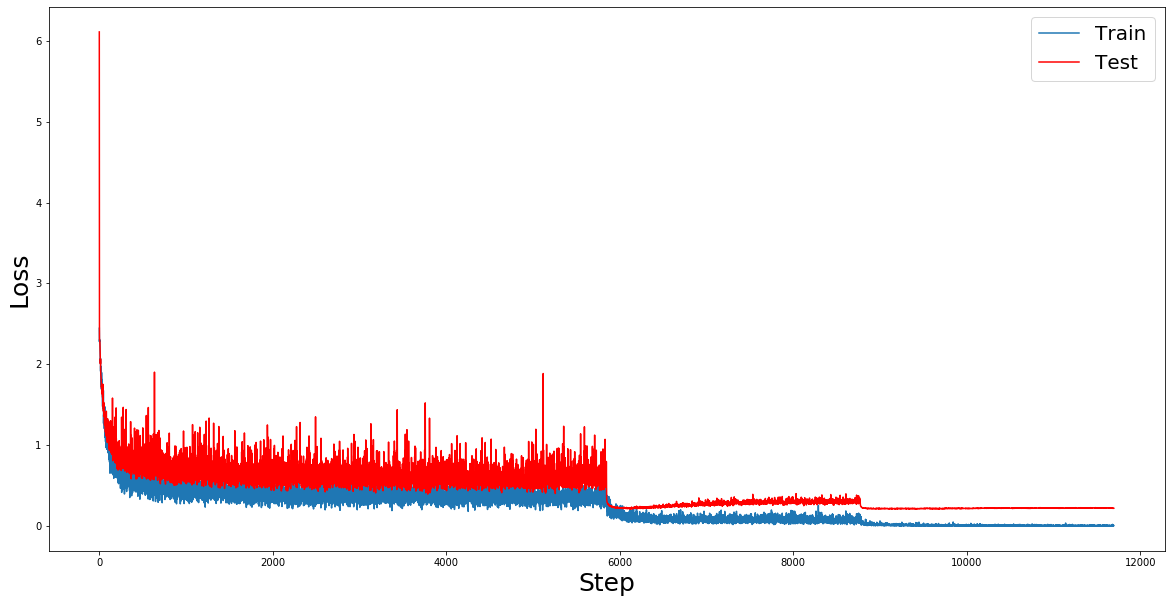

In [10]:
label_fontsize = 25

plt.figure(figsize=(20, 10))
train_lossline, = plt.plot(resnext.train_losses[2:], label='Train')
test_lossline, = plt.plot(resnext.test_losses[2:], color='red', label='Test')
plt.legend(handles=[train_lossline, test_lossline], fontsize=20)
plt.xlabel('Step', fontsize=label_fontsize)
plt.ylabel('Loss', fontsize=label_fontsize)
plt.show()

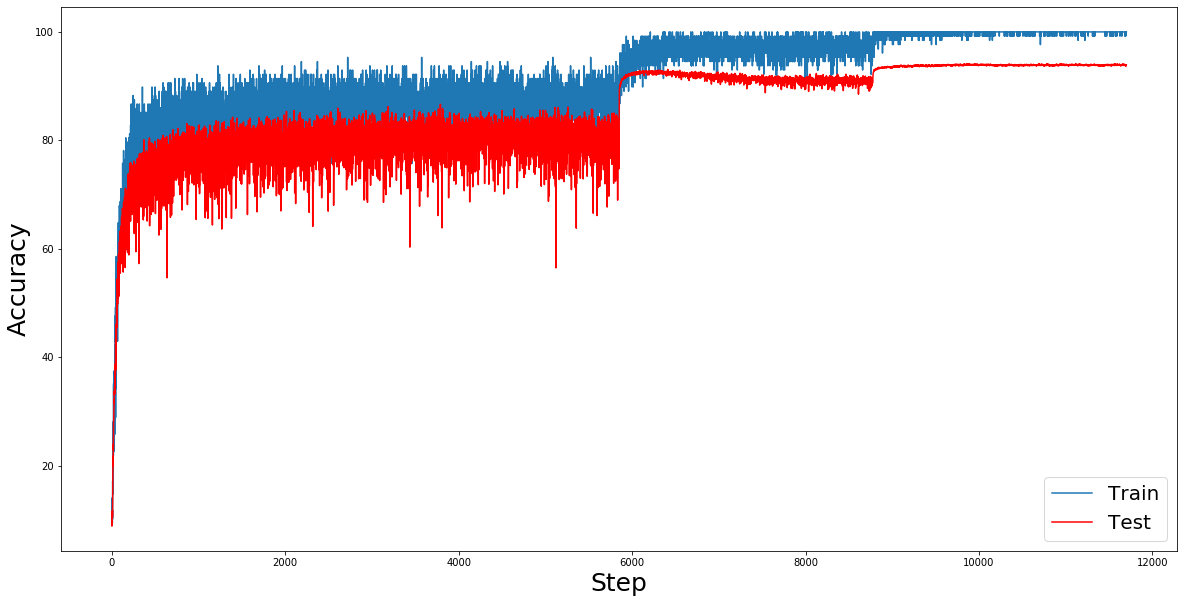

In [11]:
plt.figure(figsize=(20, 10))
train_accline, = plt.plot(resnext.train_acc, label='Train')
test_accline, = plt.plot(resnext.test_acc, color='red', label='Test')
plt.legend(handles=[train_accline, test_accline], fontsize=20)
plt.xlabel('Step', fontsize=label_fontsize)
plt.ylabel('Accuracy', fontsize=label_fontsize)
plt.show()